In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import ast

### 데이터 로드

In [2]:
df = pd.read_csv('/Users/kimjm/Desktop/SKN_19/mini-proj/data/tracks.csv')

/var/folders/65/zhsxn8gj50ldq2qmstz0zqqm0000gn/T/ipykernel_44690/2608508342.py:1: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kimjm/Desktop/SKN_19/mini-proj/data/tracks.csv')


### 데이터 구조 및 기초 통계 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899702 entries, 0 to 899701
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   track_id            899702 non-null  object 
 1   streams             5870 non-null    float64
 2   artist_followers    892496 non-null  float64
 3   genres              892516 non-null  object 
 4   album_total_tracks  899701 non-null  float64
 5   track_artists       99943 non-null   object 
 6   artist_popularity   892516 non-null  float64
 7   explicit            899701 non-null  object 
 8   tempo               899224 non-null  float64
 9   chart               7040 non-null    object 
 10  album_release_date  899701 non-null  object 
 11  energy              899224 non-null  float64
 12  key                 899224 non-null  float64
 13  added_at            394649 non-null  object 
 14  popularity          899701 non-null  float64
 15  track_album_album   99997 non-null

In [4]:
df.describe()

,streams,artist_followers,album_total_tracks,artist_popularity,tempo,energy,key,popularity,duration_ms,track_track_number,rank,mode,time_signature,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness
count,5.870000e+03,8.924960e+05,899701.000000,892516.000000,899224.000000,899224.000000,899224.000000,899701.000000,7.040000e+03,99997.000000,7040.000000,899224.000000,899224.000000,899224.000000,899224.000000,899224.000000,899224.000000,899224.000000,899224.000000,899224.000000
mean,3.465394e+04,1.961705e+06,13.978811,42.487238,119.210532,0.535413,5.225843,21.881982,2.188932e+05,5.686101,111.949716,0.628009,3.875880,0.080717,0.550239,0.437144,0.414573,0.186627,0.300456,-10.833539
std,5.690453e+04,7.912157e+06,23.814172,21.031606,30.494827,0.288274,3.555943,20.019990,5.466561e+04,7.785758,62.070924,0.483336,0.478677,0.093727,0.190850,0.270941,0.375643,0.163009,0.391504,6.941107
min,1.001000e+03,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000
25%,4.640250e+03,5.629000e+03,2.000000,28.000000,95.374000,0.296000,2.000000,0.000000,1.879482e+05,1.000000,49.000000,0.000000,4.000000,0.036100,0.425000,0.202000,0.038200,0.096200,0.000002,-13.643000
50%,1.744950e+04,7.050300e+04,11.000000,44.000000,119.984000,0.567000,5.000000,20.000000,2.121330e+05,3.000000,121.000000,1.000000,4.000000,0.046500,0.570000,0.411000,0.308000,0.119000,0.005350,-8.740000
75%,3.932750e+04,7.393110e+05,16.000000,58.000000,138.451000,0.783000,8.000000,37.000000,2.418942e+05,8.000000,171.000000,1.000000,4.000000,0.076800,0.694000,0.655000,0.814000,0.218000,0.787000,-5.983000
max,1.367372e+06,1.137599e+08,1000.000000,100.000000,249.899000,1.000000,11.000000,98.000000,1.037586e+06,481.000000,200.000000,1.000000,5.000000,0.967000,0.995000,1.000000,0.996000,1.000000,1.000000,5.096000


In [5]:
df.columns

Index(['track_id', 'streams', 'artist_followers', 'genres',
       'album_total_tracks', 'track_artists', 'artist_popularity', 'explicit',
       'tempo', 'chart', 'album_release_date', 'energy', 'key', 'added_at',
       'popularity', 'track_album_album', 'duration_ms', 'available_markets',
       'track_track_number', 'rank', 'mode', 'time_signature', 'album_name',
       'speechiness', 'region', 'danceability', 'valence', 'acousticness',
       'liveness', 'trend', 'instrumentalness', 'loudness', 'name'],
      dtype='object')

### 결측치 및 이상치 탐지

In [6]:
df.isna().sum()

track_id                   0
streams               893832
artist_followers        7206
genres                  7186
album_total_tracks         1
track_artists         799759
artist_popularity       7186
explicit                   1
tempo                    478
chart                 892662
album_release_date         1
energy                   478
key                      478
added_at              505053
popularity                 1
track_album_album     799705
duration_ms           892662
available_markets          1
track_track_number    799705
rank                  892662
mode                     478
time_signature           478
album_name               431
speechiness              478
region                892662
danceability             478
valence                  478
acousticness             478
liveness                 478
trend                 892662
instrumentalness         478
loudness                 478
name                     487
dtype: int64

In [7]:
# 결측치 개수 확인
missing_values = df.isnull().sum()
print("결측치 개수:\n", missing_values)

# 결측치 비율 확인
missing_ratio = (missing_values / len(df)) * 100
print("\n결측치 비율 (%):\n", missing_ratio)

결측치 개수:
 track_id                   0
streams               893832
artist_followers        7206
genres                  7186
album_total_tracks         1
track_artists         799759
artist_popularity       7186
explicit                   1
tempo                    478
chart                 892662
album_release_date         1
energy                   478
key                      478
added_at              505053
popularity                 1
track_album_album     799705
duration_ms           892662
available_markets          1
track_track_number    799705
rank                  892662
mode                     478
time_signature           478
album_name               431
speechiness              478
region                892662
danceability             478
valence                  478
acousticness             478
liveness                 478
trend                 892662
instrumentalness         478
loudness                 478
name                     487
dtype: int64

결측치 비율 (%):
 track_i

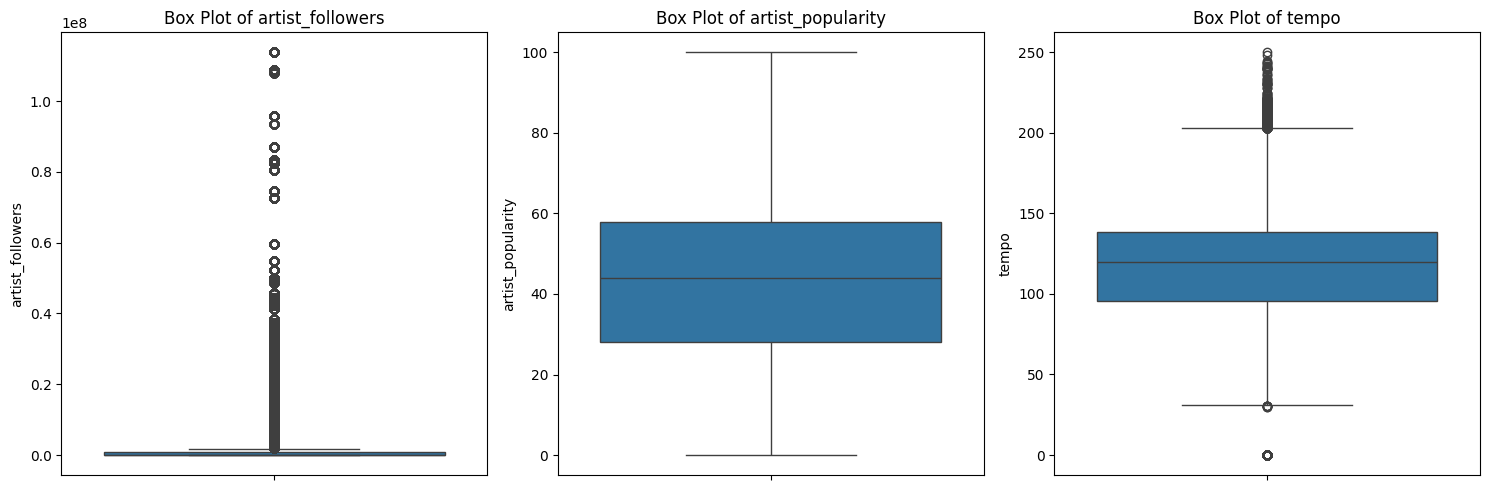

In [8]:
numerical_cols = ['artist_followers', 'artist_popularity', 'tempo']

# numerical_cols = ['time_signature', 'speechiness', 'danceability', 'valence', 'acousticness']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [9]:
delete_col = ['streams', 'album_total_tracks', 'chart', 'available_markets', 'region', 'mode', 'track_id', 'album_name', 'track_track_number', 'rank', 'track_artists', 'duration_ms', 'trend', 'track_album_album', 'added_at', 'name']
dropped_df = df.drop(delete_col, axis=1)

In [10]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899702 entries, 0 to 899701
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   artist_followers    892496 non-null  float64
 1   genres              892516 non-null  object 
 2   artist_popularity   892516 non-null  float64
 3   explicit            899701 non-null  object 
 4   tempo               899224 non-null  float64
 5   album_release_date  899701 non-null  object 
 6   energy              899224 non-null  float64
 7   key                 899224 non-null  float64
 8   popularity          899701 non-null  float64
 9   time_signature      899224 non-null  float64
 10  speechiness         899224 non-null  float64
 11  danceability        899224 non-null  float64
 12  valence             899224 non-null  float64
 13  acousticness        899224 non-null  float64
 14  liveness            899224 non-null  float64
 15  instrumentalness    899224 non-nul

In [11]:
clean_df = dropped_df.dropna(subset='tempo', axis=0)
clean_df.isna().sum()

artist_followers      7204
genres                7184
artist_popularity     7184
explicit                 1
tempo                    0
album_release_date       1
energy                   0
key                      0
popularity               1
time_signature           0
speechiness              0
danceability             0
valence                  0
acousticness             0
liveness                 0
instrumentalness         0
loudness                 0
dtype: int64

In [12]:
clean_df[clean_df['genres'].isnull()]
# 장르 null인 경우에 대부분이 artist followers/popularity도 null

,artist_followers,genres,artist_popularity,explicit,tempo,album_release_date,energy,key,popularity,time_signature,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness
856405,NaN,NaN,NaN,False,125.036,2016-11-04,0.9650,0.0,0.0,4.0,0.0512,0.436,0.559,0.000132,0.2120,0.00000,-3.605
856406,NaN,NaN,NaN,False,119.952,2007-11-01,0.6290,11.0,38.0,4.0,0.0284,0.653,0.820,0.148000,0.1510,0.94200,-4.840
856407,NaN,NaN,NaN,False,127.367,2007-01-01,0.8860,2.0,0.0,4.0,0.0934,0.361,0.308,0.008490,0.1150,0.09860,-7.712
856408,NaN,NaN,NaN,False,171.647,1981-01-01,0.4130,0.0,49.0,4.0,0.0314,0.538,0.700,0.197000,0.0446,0.00123,-14.745
856409,NaN,NaN,NaN,False,94.123,1995-01-01,0.2090,5.0,0.0,3.0,0.0424,0.695,0.524,0.949000,0.1570,0.00750,-11.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887747,NaN,NaN,NaN,False,169.944,2008-02-29,0.5800,0.0,30.0,5.0,0.0339,0.637,0.438,0.399000,0.1010,0.39900,-6.486
887748,NaN,NaN,NaN,False,143.013,2023-11-10,0.0322,1.0,14.0,3.0,0.0604,0.500,0.222,0.993000,0.0992,0.93300,-25.174
887749,NaN,NaN,NaN,False,173.945,2015-09-30,0.9420,7.0,29.0,4.0,0.1240,0.609,0.650,0.223000,0.0517,0.00121,-5.532
887750,NaN,NaN,NaN,False,159.914,2019-09-04,0.8180,0.0,22.0,4.0,0.0685,0.320,0.401,0.001340,0.3010,0.11200,-6.893


In [13]:
# 장르, artist follower null 제거
clean_df = clean_df.dropna(subset=['genres', 'artist_followers'], axis=0)

In [14]:
clean_df.isna().sum()

artist_followers      0
genres                0
artist_popularity     0
explicit              1
tempo                 0
album_release_date    1
energy                0
key                   0
popularity            1
time_signature        0
speechiness           0
danceability          0
valence               0
acousticness          0
liveness              0
instrumentalness      0
loudness              0
dtype: int64

In [15]:
# 아티스트 팔로워 null 확인
clean_df[clean_df['artist_followers'].isnull()]

,artist_followers,genres,artist_popularity,explicit,tempo,album_release_date,energy,key,popularity,time_signature,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness


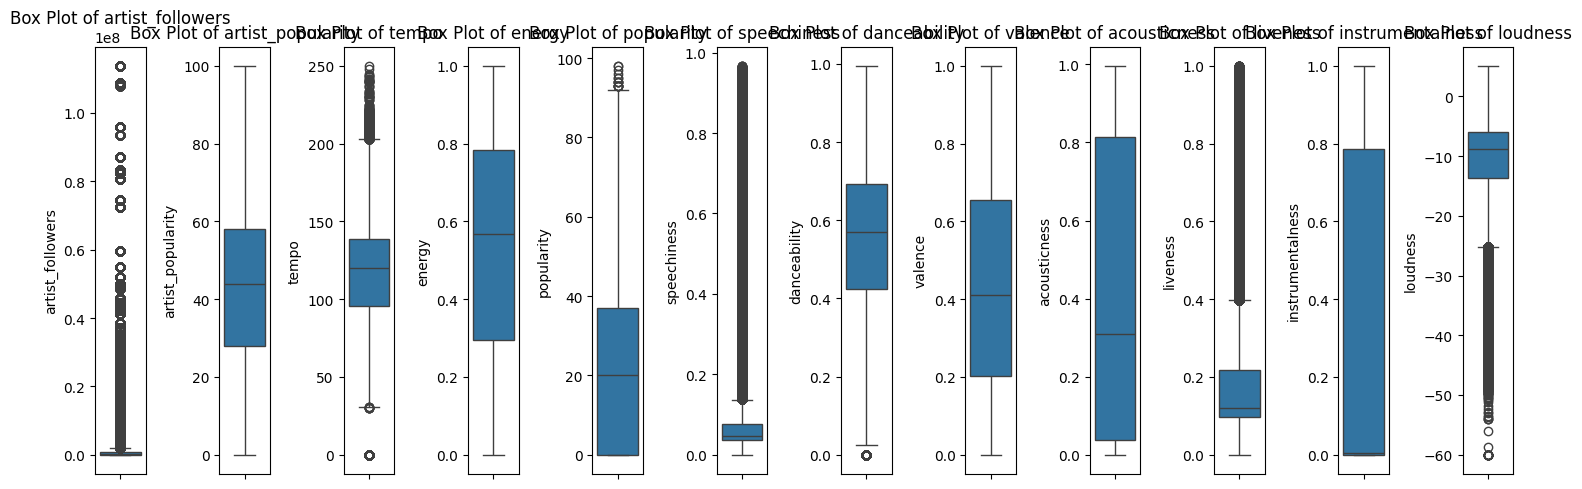

In [16]:
numerical_cols = ['artist_followers', 'artist_popularity', 'tempo', 'energy', 'popularity', 'speechiness', 'danceability', 'valence', 'acousticness', 'liveness', 'instrumentalness', 'loudness']

# 스케일링 전 숫자 컬럼 시각화
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=clean_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [17]:
# 장르별 빈도 확인
print("장르별 빈도:\n", clean_df['genres'].value_counts())
print("연도 빈도:\n", clean_df['album_release_date'].value_counts())

장르별 빈도:
 genres
[]                                                                                                             170977
['baroque', 'classical', 'early music', 'german baroque']                                                        4185
['calming instrumental']                                                                                         3506
['classical', 'classical era']                                                                                   3484
['pop']                                                                                                          3449
                                                                                                                ...  
['boom bap brasileiro']                                                                                             1
['art punk', 'canadian post-punk', 'crank wave', 'garage psych', 'noise pop', 'noise rock', 'quebec indie']         1
['detroit indie', 'hopebeat']           

In [18]:
# 연도 변환
clean_df['album_release_date'] = clean_df['album_release_date'].str[:4]

# 1. 'album_release_date' 컬럼을 숫자 타입으로 변환 (변환 불가 값은 NaT로 처리)
clean_df['album_release_date'] = pd.to_numeric(clean_df['album_release_date'], errors='coerce')

# 2. 1900년 이전 및 NaT 데이터를 제거
df_filtered = clean_df[clean_df['album_release_date'] >= 1900].copy()

# 3. 다시 정수형으로 바꿔서 소수점(.0) 없애기
df_filtered['album_release_date'] = df_filtered['album_release_date'].astype(int)

# 1900년대 이전 데이터 삭제된 df
df_filtered

,artist_followers,genres,artist_popularity,explicit,tempo,album_release_date,energy,key,popularity,time_signature,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness
0,2338837.0,"['indie pop', 'la indie', 'pov: indie']",74.0,False,97.129,2018,0.1230,7.0,0.0,4.0,0.0407,0.373,0.138,0.94800,0.0816,0.000000,-15.193
1,84914.0,"['lilith', 'new wave pop']",51.0,False,103.773,1996,0.4530,5.0,71.0,4.0,0.0348,0.744,0.122,0.62700,0.0898,0.421000,-11.977
2,59150.0,"['deep groove house', 'house', 'tech house']",54.0,False,122.030,2014,0.8780,9.0,0.0,4.0,0.0357,0.747,0.897,0.07940,0.3700,0.000531,-5.209
3,1528.0,[],0.0,False,84.099,2001,0.4840,7.0,0.0,4.0,0.0356,0.604,0.564,0.10000,0.0865,0.000000,-7.097
4,6776.0,"['chill lounge', 'deep chill']",28.0,False,156.017,2014,0.4470,0.0,7.0,4.0,0.0613,0.761,0.761,0.06160,0.0822,0.873000,-10.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899697,40725.0,['melodic techno'],36.0,False,123.006,2022,0.7430,11.0,28.0,4.0,0.0532,0.803,0.176,0.00120,0.0618,0.308000,-6.241
899698,10523.0,['zouk riddim'],32.0,False,92.999,2016,0.7560,1.0,0.0,4.0,0.0376,0.655,0.401,0.00992,0.3370,0.028000,-7.407
899699,43895.0,"['chanson', 'classic french pop', 'french pop']",42.0,False,85.571,2017,0.6360,3.0,0.0,4.0,0.0343,0.596,0.409,0.05580,0.0629,0.000000,-8.882
899700,3.0,[],6.0,False,61.653,2023,0.0908,3.0,0.0,3.0,0.0897,0.618,0.850,0.92900,0.0922,0.898000,-25.645


In [19]:
# 1900년대 이전 데이터 삭제 확인
print("연도 빈도:\n", df_filtered['album_release_date'].value_counts())

연도 빈도:
 album_release_date
2023    85016
2022    68291
2020    64951
2021    64807
2019    54374
        ...  
1912        1
1921        1
1909        1
1919        1
1908        1
Name: count, Length: 122, dtype: int64


In [20]:
# 욕설 유무 boolean -> int
df_filtered['explicit'] = df_filtered['explicit'].astype(int)

In [21]:
# 1. 문자열을 실제 리스트로 변환
# .apply(ast.literal_eval)는 각 행의 문자열을 파이썬 객체(리스트)로 변환해줍니다.
df_filtered['genres'] = df_filtered['genres'].apply(ast.literal_eval)

# 2. 이제 실제 리스트이므로 len() 함수로 빈 리스트를 찾을 수 있음
df_filtered['genre_is_missing'] = (df_filtered['genres'].apply(len) == 0).astype(int)

# 3. 빈 리스트를 ['unknown'] 리스트로 대체
df_filtered.loc[df_filtered['genres'].apply(len) == 0, 'genres'] = pd.Series([['unknown']] * df_filtered[df_filtered['genres'].apply(len) == 0].shape[0])

In [ ]:
# 장르 unknown으로 변환됐는지 확인

# 1. 'genres' 컬럼을 explode하여 각 장르를 개별 행으로 만듭니다.
exploded_genres = df_filtered['genres'].explode()

# 2. explode된 결과에 value_counts()를 적용하여 장르별 빈도를 계산합니다.
genre_counts = exploded_genres.value_counts()

genre_counts

genres
classical                   33788
rock                        31301
unknown                     30604
pop                         22943
rap                         16894
                            ...  
vintage western                 1
kumaoni pop                     1
german literature               1
serbian alternative rock        1
icelandic choir                 1
Name: count, Length: 5889, dtype: int64